In [46]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')


In [47]:
data = pd.read_csv(r'C:\Users\parag\Desktop\ironhack\lab\week9\lab-revisiting-machine-learning/learningSet.csv')

In [48]:
data.shape

(95412, 481)

In [49]:
data.describe()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
count,95412.000000,95412.000000,95412.000000,71747.000000,12386.000000,74126.000000,50680.000000,95412.000000,42558.000000,42558.000000,...,95412.000000,85439.000000,85439.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95280.000000
mean,9141.363256,54.223117,2723.602933,61.611649,1.527773,3.886248,5.345699,3.321438,0.152075,0.059166,...,9135.651648,9151.022917,8.093739,13.347786,95778.176959,0.050759,0.793073,0.500618,1.910053,31.533711
std,343.454752,953.844476,2132.241295,16.664199,0.806861,1.854960,2.742490,9.306899,0.470023,0.262078,...,320.394019,294.257260,8.213242,10.769997,55284.596094,0.219506,4.429725,0.500002,1.072749,18.764614
min,8306.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7211.000000,0.000000,1.285714,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,8801.000000,0.000000,201.000000,48.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,...,8810.000000,8903.000000,4.000000,8.384615,47910.750000,0.000000,0.000000,0.000000,1.000000,15.000000
50%,9201.000000,1.000000,2610.000000,62.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,...,9201.000000,9204.000000,6.000000,11.636364,95681.500000,0.000000,0.000000,1.000000,2.000000,32.000000
75%,9501.000000,2.000000,4601.000000,75.000000,2.000000,5.000000,8.000000,3.000000,0.000000,0.000000,...,9409.000000,9409.000000,11.000000,15.477955,143643.500000,0.000000,0.000000,1.000000,3.000000,49.000000
max,9701.000000,72002.000000,9710.000000,98.000000,7.000000,7.000000,9.000000,241.000000,6.000000,4.000000,...,9603.000000,9702.000000,1088.000000,1000.000000,191779.000000,1.000000,200.000000,1.000000,4.000000,62.000000


In [50]:
#getting all columns in pe8 case.
cols = []

for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(" ","_"))
    
data.columns = cols


In [51]:
#Check for null values in all the columns

nulls = pd.DataFrame(data.isna().sum()*100/len(data), columns=['percentage'])
nulls.sort_values('percentage', ascending = False).head(80)

,percentage
rdate_5,99.990567
ramnt_5,99.990567
rdate_3,99.746363
ramnt_3,99.746363
rdate_4,99.705488
...,...
adate_16,21.343227
adate_14,19.774242
adate_9,11.785729
adate_11,10.923154


In [52]:
#First i will divide numerical data and non numericals into 2 df
#function that divides data into numerical and categoricals.

def numerical_and_others(x):
    categorical = x.select_dtypes(include = np.object)
    numerical = x.select_dtypes(include = np.number)
    return numerical, categorical

In [53]:
numerical, categorical = numerical_and_others(data)

In [54]:
numerical

,odatedw,tcode,dob,age,numchld,income,wealth1,hit,mbcraft,mbgarden,...,fistdate,nextdate,timelag,avggift,controln,target_b,target_d,hphone_d,rfa_2f,cluster2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1.0,0.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,...,9602,NaN,NaN,25.000000,184568,0,0.0,0,1,12.0
95408,9601,1,5001,48.0,1.0,7.0,9.0,1,0.0,0.0,...,9603,NaN,NaN,20.000000,122706,0,0.0,1,1,2.0
95409,9501,1,3801,60.0,NaN,NaN,NaN,0,NaN,NaN,...,9410,9501.0,3.0,8.285714,189641,0,0.0,1,3,34.0
95410,8601,0,4005,58.0,NaN,7.0,NaN,0,NaN,NaN,...,8612,8704.0,4.0,12.146341,4693,1,18.0,1,4,11.0


In [55]:
categorical

,osource,state,zip,mailcode,pvastate,noexch,recinhse,recp3,recpgvg,recsweep,...,rfa_21,rfa_22,rfa_23,rfa_24,rfa_2r,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,geocode2
0,GRI,IL,61081,,,0,,,,,...,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,,,0,,,,,...,N1E,N1E,,F1E,L,G,X,X,X,A
2,AMH,NC,27017,,,0,,,,,...,,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,,,0,,,,,...,A1D,A1D,,,L,E,X,X,X,C
4,,FL,33176,,,0,X,X,,,...,A3D,I4E,A3D,A3D,L,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,ASE,AK,99504,,,0,,,,,...,,,,,L,G,X,X,X,C
95408,DCD,TX,77379,,,0,,,,,...,,,,,L,F,X,X,X,A
95409,MBC,MI,48910,,,0,,X,,,...,P1D,P1D,,,L,E,X,X,X,B
95410,PRV,CA,91320,,,0,X,,,,...,A1F,A1F,S2F,S3F,L,F,X,X,X,A


In [56]:
#Create a new empty list called drop_list.
#We will append this list and then drop all the columns in this list later.

drop_list = ['zip','osource']

In [57]:
#Identify columns that over 85% missing values

nulls_to_drop = nulls[nulls['percentage'] > 85]
nulls_to_drop

,percentage
numchld,87.018404
rdate_3,99.746363
rdate_4,99.705488
rdate_5,99.990567
rdate_6,99.186685
rdate_7,90.677273
rdate_10,89.035970
rdate_13,87.160944
rdate_15,92.388798
rdate_17,90.146942


In [58]:
#Remove those columns from the dataframe

data = data.drop(columns=['numchld','rdate_3','rdate_4','rdate_5','rdate_6','rdate_7','rdate_10','rdate_13','rdate_15','rdate_17','rdate_20','rdate_21','rdate_23'])

In [59]:
data.info


<bound method DataFrame.info of        odatedw osource  tcode state    zip mailcode pvastate   dob noexch  \
0         8901     GRI      0    IL  61081                    3712      0   
1         9401     BOA      1    CA  91326                    5202      0   
2         9001     AMH      1    NC  27017                       0      0   
3         8701     BRY      0    CA  95953                    2801      0   
4         8601              0    FL  33176                    2001      0   
...        ...     ...    ...   ...    ...      ...      ...   ...    ...   
95407     9601     ASE      1    AK  99504                       0      0   
95408     9601     DCD      1    TX  77379                    5001      0   
95409     9501     MBC      1    MI  48910                    3801      0   
95410     8601     PRV      0    CA  91320                    4005      0   
95411     8801     MCC      2    NC  28409                    1801      0   

      recinhse  ... target_d hphone_d rfa_2

In [60]:
#Reduce the number of categories in the column GENDER.
#The column should only have either "M" for males, "F" for females, and "other" for all the rest

#replacing the nulls with "F" because it is what they are suposed to be.
print(categorical['gender'].value_counts())
categorical['gender'] = categorical['gender'].fillna('F')

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: gender, dtype: int64


In [61]:
categorical['gender'] = categorical['gender'].map(lambda x: str(x).replace(' ','O').replace('C','O').replace('A','O').replace('U', 'O').replace('J','O'))

In [62]:
print(categorical['gender'].value_counts())

F    51277
M    39094
O     5041
Name: gender, dtype: int64


In [63]:
data = data.drop(['gender'],axis=1)

In [64]:
data['gender'] = categorical['gender']
data['gender'].value_counts()

F    51277
M    39094
O     5041
Name: gender, dtype: int64

### Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA

In [65]:
# null percentage in the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA
null_data = data[data.columns[data.columns.isin(['geocode2','wealth1','adi','dma','msa'])]]

In [66]:
#Check for null values in all the columns

nulls = pd.DataFrame(null_data.isna().sum()*100/len(null_data), columns=['percentage'])
nulls.sort_values('percentage', ascending = False).head(80)



,percentage
wealth1,46.882992
msa,0.138347
adi,0.138347
dma,0.138347
geocode2,0.138347


In [67]:
nulls = pd.DataFrame(null_data.isna().sum(), columns=['count'])
nulls.sort_values('count', ascending = False).head(80)


,count
wealth1,44732
msa,132
adi,132
dma,132
geocode2,132


In [68]:
# counting the number of every value in the column GEOCODE2
print(null_data['geocode2'].value_counts(dropna = False))

A      34484
B      28505
D      16580
C      15524
         187
NaN      132
Name: geocode2, dtype: int64


In [69]:
null_data['geocode2']= null_data['geocode2'].map(lambda x: str(x).replace(' ','B').replace('nan','A'))
print(null_data['geocode2'].value_counts(dropna = False))

A    34616
B    28692
D    16580
C    15524
Name: geocode2, dtype: int64


In [70]:
# counting the number of every value in the column GEOCODE2
print(null_data['wealth1'].value_counts(dropna = False))

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: wealth1, dtype: int64


In [75]:
print(null_data.value_counts(dropna = False))

wealth1  msa     adi    dma    geocode2
NaN      4480.0  13.0   803.0  A           2421
         1600.0  51.0   602.0  A           1734
         2160.0  57.0   505.0  A           1205
         5945.0  13.0   803.0  A            925
         7320.0  15.0   825.0  A            736
                                           ... 
9.0      3080.0  315.0  658.0  C              1
3.0      0.0     127.0  528.0  C              1
1.0      4920.0  179.0  640.0  D              1
9.0      2985.0  393.0  724.0  C              1
7.0      5483.0  9.0    501.0  A              1
Length: 5398, dtype: int64


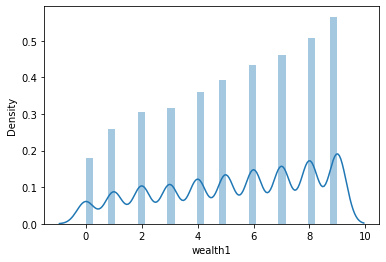

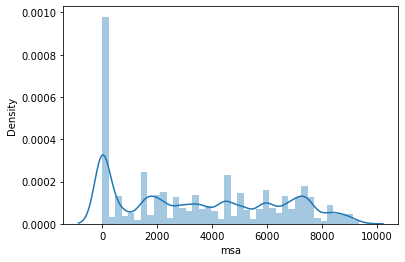

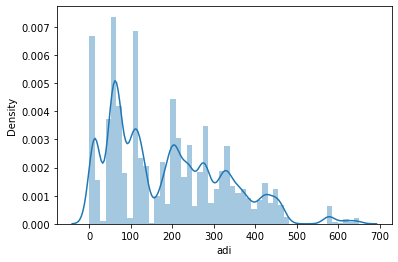

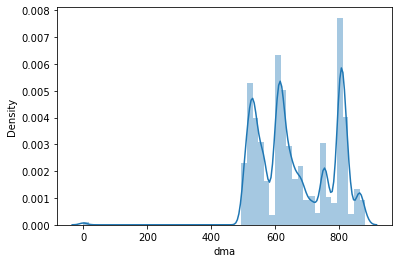

In [82]:
for col in null_data.columns[null_data.isna().any()]:
    sns.distplot(null_data[null_data[col].isna()==False][col])
    plt.show()
